# Machine learning experiment 1

In [1]:
# setup code

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 16.0) # set default size of plots

%load_ext autoreload
%autoreload 2

# Housing Data Loading and Preprocessing

In [2]:
# Load the raw housing_scale data.
filename = 'dataset/housing_scale'
X, y = load_svmlight_file(filename)

# Split the data into train, and val sets.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

Train data shape:  (404, 13)
Train labels shape:  (404,)
Validation data shape:  (102, 13)
Validation labels shape:  (102,)


In [3]:
# Preprocessing: subtract the mean of each housing feature
# first: compute the housing feature mean based on the training data

_mean = np.mean(X_train, axis=0)
print(_mean)

[[-0.91702508 -0.76945545 -0.22159092 -0.84158416 -0.308534    0.03766704
   0.33956011 -0.50958712 -0.26345231 -0.17459005  0.24225822  0.79955463
  -0.3902572 ]]


In [4]:
# second: subtract the mean from train and X_val data
X_train -= _mean
X_val -= _mean

In [5]:
# third: append the bias dimension of ones
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])

print(X_train.shape, X_val.shape)

(404, 14) (102, 14)


In [6]:
# 
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

print('Train labels shape: ', y_train.shape)
print('Validation labels shape: ', y_val.shape)

Train labels shape:  (404, 1)
Validation labels shape:  (102, 1)


# Linear Regresser

regresser_loss_naive(w, X_train, y_train, reg) return loss, grad

regresser_loss_vectorized(w, X_train, y_train, reg) return loss, grad

prediction = 
loss = 0.5 * (_y - y)**2 + reg * sum(W**2) 

In [7]:
def regresser_loss_naive(W, X, y, reg):
    '''
    linear regression loss function, naive implementation (with loops).
    
    Inputs:
    - W: A numpy array of shape (D, 1) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.
    - y: A numpy array of shape (N, 1) containing training labels.
    - reg: (float) regularization strength
    
    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    '''
    num_train = X.shape[0]
    
    loss = 0.0
    grad = np.zeros(W.shape) # initialize the gradient as zero
    
    # compute the loss and the gradient
    for i in range(num_train):
        _y = np.sum(X[i] * W)
        loss += (y[i][0] - _y)**2
        grad += - 2 * X[i].T * (y[i][0] - _y)
    loss /= num_train
    grad /= num_train
    
    # Add regularization to the loss and gradient.
    loss += reg * 0.5 * np.sum(np.square(W))
    grad += reg * W
    
    return loss, grad

def regresser_loss_vectorized(W, X, y, reg):
    '''
    linear regression loss function, vectorized implementation.
    
    Inputs and outputs are the same as regresser_loss_naive.
    '''
    _y = X.dot(W) # (404, 1)
    loss = np.mean(np.square(y - _y)) + reg * 0.5 * np.sum(np.square(W))
    grad = - 2 * X.T.dot(y - _y) / X.shape[0] + reg * W
    return loss, grad

# Gradient Check

Performing a gradient check is as simple as comparing the analytic gradient to the numerical gradient. 


In [8]:
def eval_numerical_gradient(f, x, analytic_grad, h=1e-5):
    """
    Evaluate a numeric gradient for a function that accepts a numpy
    array and returns a numpy array.
    """
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index
        
        oldval = x[ix]
        x[ix] = oldval + h
        pos = f(x)
        x[ix] = oldval - h
        neg = f(x)
        x[ix] = oldval

        grad_numerical = (pos - neg) / (2 * h)
        grad_analytic = analytic_grad[ix]
        rel_error = abs(grad_numerical - grad_analytic) / (abs(grad_numerical) + abs(grad_analytic))
        print('numerical: %f analytic: %f, relative error: %e' % (grad_numerical, grad_analytic, rel_error))
        
        it.iternext()

In [9]:
W = np.zeros((X_train.shape[1], 1))

# do the gradient check with regularization turned off
print('gradient check with regularization turned off')
loss, grad = regresser_loss_naive(W, X_train, y_train, 0.0)
f = lambda w: regresser_loss_naive(w, X_train, y_train, 0.0)[0]
grad_numerical = eval_numerical_gradient(f, W, grad)

# do the gradient check once again with regularization turned on
print('\ngradient check with regularization turned on')
loss, grad = regresser_loss_vectorized(W, X_train, y_train, 0.5)
f = lambda w: regresser_loss_vectorized(w, X_train, y_train, 0.5)[0]
grad_numerical = eval_numerical_gradient(f, W, grad)

gradient check with regularization turned off
numerical: 1.450196 analytic: 1.450196, relative error: 2.500940e-09
numerical: -3.240397 analytic: -3.240397, relative error: 1.674595e-09
numerical: 4.489404 analytic: 4.489404, relative error: 4.655180e-09
numerical: -1.516704 analytic: -1.516704, relative error: 1.586829e-08
numerical: 3.886106 analytic: 3.886106, relative error: 3.878214e-09
numerical: -3.181649 analytic: -3.181649, relative error: 1.135836e-09
numerical: 4.368756 analytic: 4.368756, relative error: 3.308320e-09
numerical: -1.940520 analytic: -1.940520, relative error: 2.548463e-09
numerical: 5.329158 analytic: 5.329158, relative error: 2.154025e-09
numerical: 5.378774 analytic: 5.378774, relative error: 4.449455e-09
numerical: 4.349617 analytic: 4.349617, relative error: 1.702340e-09
numerical: -2.730431 analytic: -2.730431, relative error: 7.580849e-10
numerical: 5.300355 analytic: 5.300355, relative error: 1.074430e-09
numerical: -45.044554 analytic: -45.044554, rel

# Performance Comparison

compare the performance of the naive implementation and vetorized implementation of gradient computing.



In [10]:
import time

tic = time.time()
loss_naive, grad_naive = regresser_loss_naive(W, X_train, y_train, 0.5)
toc = time.time()
print('Naive implementation computed in %fs' % (toc - tic))


tic = time.time()
loss_vectorized, grad_vectorized = regresser_loss_vectorized(W, X_train, y_train, 0.5)
toc = time.time()
print('Vectorized implementation computed in %fs' % (toc - tic))


print('difference of loss: %f' % (loss_naive - loss_vectorized))
difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference of gradient: %f' % difference)

Naive implementation computed in 0.012332s
Vectorized implementation computed in 0.000303s
difference of loss: 0.000000
difference of gradient: 0.000000


# Gradient Descent

In [11]:
#
# reg: regularization strength.
# lr: learning rate for optimization.
# num_iters: number of steps to take when optimizing
reg = 0.5
lr = 0.001
num_iters=3000


W = np.zeros((X_train.shape[1], 1))
loss_train_history = []
loss_val_history = []
for i in range(num_iters):
    loss_train, grad = regresser_loss_vectorized(W, X_train, y_train, reg)
    W -= lr * grad
    
    loss_val, _ = regresser_loss_vectorized(W, X_val, y_val, reg)
    
    loss_train_history.append(loss_train)
    loss_val_history.append(loss_val)
    if i % 100 == 0:
        print('iteration %d / %d: train loss: %f\tvaluation loss: %f' 
              % (i, num_iters, loss_train, loss_val))

iteration 0 / 3000: train loss: 588.034356	valuation loss: 606.274156
iteration 100 / 3000: train loss: 414.155465	valuation loss: 437.078733
iteration 200 / 3000: train loss: 310.078673	valuation loss: 334.630586
iteration 300 / 3000: train loss: 247.436201	valuation loss: 272.148823
iteration 400 / 3000: train loss: 209.531183	valuation loss: 233.745890
iteration 500 / 3000: train loss: 186.468383	valuation loss: 209.931917
iteration 600 / 3000: train loss: 172.350288	valuation loss: 195.005927
iteration 700 / 3000: train loss: 163.645497	valuation loss: 185.526136
iteration 800 / 3000: train loss: 158.230977	valuation loss: 179.405345
iteration 900 / 3000: train loss: 154.825866	valuation loss: 175.372308
iteration 1000 / 3000: train loss: 152.654814	valuation loss: 172.649238
iteration 1100 / 3000: train loss: 151.246875	valuation loss: 170.757855
iteration 1200 / 3000: train loss: 150.314934	valuation loss: 169.402301
iteration 1300 / 3000: train loss: 149.683177	valuation loss: 1

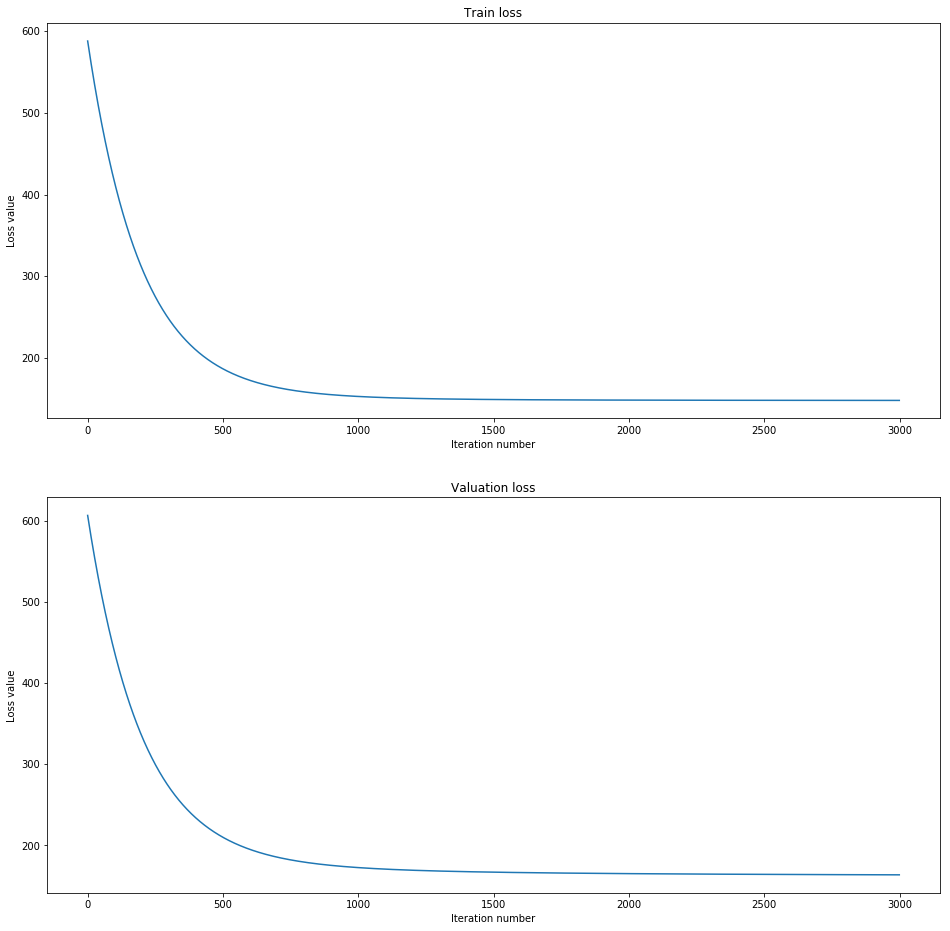

In [12]:
# plot the loss as a function of iteration number:

plt.subplot(2, 1, 1)
plt.title('Train loss')
plt.plot(loss_train_history)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')

plt.subplot(2, 1, 2)
plt.title('Valuation loss')
plt.plot(loss_val_history)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

# Cross-Validation

Use the validation set to tune hyperparameters (regularization strength and learning rate).



In [13]:
# first run coarse search
# If the cost is 3 times greater than origin cost,break out early to avoid explosions

max_count = 100

results = {}
lowest_loss = float('inf')   # The lowest validation loss that we have seen so far.
best_W = None # The weight matrix that achieved thelowest validation loss.
best_setup = None # the best hyperparameter to get the best_W, (lr, reg, num_iters)

for i in range(max_count):
    W = np.zeros((X_train.shape[1], 1))
    reg = 10**np.random.uniform(-5, 5)
    lr = 10**np.random.uniform(-6, -3)
    
    loss_init, _ = regresser_loss_vectorized(W, X_train, y_train, reg)
    for i in range(5000):
        loss, grad = regresser_loss_vectorized(W, X_train, y_train, reg)
        W -= lr * grad
        if loss > 3 * loss_init:
            break
    loss_train, _ = regresser_loss_vectorized(W, X_train, y_train, 0)
    loss_val, _ = regresser_loss_vectorized(W, X_train, y_train, 0)
    
    results[lr, reg] = loss_train, loss_val
    if loss_val < lowest_loss:
        lowest_loss = loss_val
        best_W = W
        best_setup = (lr, reg, num_iters)


for lr, reg in sorted(results):
    loss_train, loss_val = results[(lr, reg)]
    print('lr %e, reg %e, train loss: %f, validation loss: %f' % (
                lr, reg, loss_train, loss_val))
    
print('lowest validation loss achieved: %f' % lowest_loss)

lr 1.063455e-06, reg 4.479741e+00, train loss: 576.476659, validation loss: 576.476659
lr 1.124548e-06, reg 5.744144e+00, train loss: 575.871422, validation loss: 575.871422
lr 1.224474e-06, reg 4.569962e-05, train loss: 574.591339, validation loss: 574.591339
lr 1.323595e-06, reg 2.476017e-03, train loss: 573.518216, validation loss: 573.518216
lr 1.390362e-06, reg 5.298693e-02, train loss: 572.799208, validation loss: 572.799208
lr 1.888879e-06, reg 5.602958e+03, train loss: 587.637655, validation loss: 587.637655
lr 1.954763e-06, reg 9.775005e-01, train loss: 566.836031, validation loss: 566.836031
lr 2.119718e-06, reg 1.568044e+02, train loss: 576.696351, validation loss: 576.696351
lr 2.216526e-06, reg 8.168044e-04, train loss: 563.949499, validation loss: 563.949499
lr 2.452968e-06, reg 8.684048e-03, train loss: 561.446788, validation loss: 561.446788
lr 3.238008e-06, reg 3.850527e+04, train loss: 587.976604, validation loss: 587.976604
lr 3.257046e-06, reg 7.962230e+02, train lo

In [14]:
lr 1.256167e-04, reg 5.228679e-04, train loss: 98.342621, validation loss: 98.342621
lr 1.265925e-04, reg 1.734536e-04, train loss: 97.582745, validation loss: 97.582745
lr 1.577575e-04, reg 2.114790e-05, train loss: 77.183114, validation loss: 77.183114
lr 1.822775e-04, reg 2.886181e-03, train loss: 65.172677, validation loss: 65.172677
lr 1.999056e-04, reg 3.734254e-05, train loss: 57.934372, validation loss: 57.934372
lr 2.364170e-04, reg 1.358089e-01, train loss: 54.239104, validation loss: 54.239104
lr 3.274482e-04, reg 1.557479e-04, train loss: 30.778259, validation loss: 30.778259
lr 3.354292e-04, reg 7.033270e-03, train loss: 30.287093, validation loss: 30.287093
lr 4.357737e-04, reg 2.642519e-05, train loss: 23.004004, validation loss: 23.004004
lr 6.226358e-04, reg 3.813791e-05, train loss: 18.399611, validation loss: 18.399611
lr 7.604731e-04, reg 1.564428e-01, train loss: 24.099079, validation loss: 24.099079
lr 8.707518e-04, reg 6.222566e-05, train loss: 16.199228, validation loss: 16.199228
lr 9.809586e-04, reg 2.611612e-02, train loss: 16.224287, validation loss: 16.224287

SyntaxError: invalid syntax (<ipython-input-14-df279c34132b>, line 1)

In [ ]:
max_count = 100

results = {}
lowest_loss = float('inf')   # The lowest validation loss that we have seen so far.
best_W = None # The weight matrix that achieved thelowest validation loss.
best_setup = None # the best hyperparameter to get the best_W, (lr, reg, num_iters)

for i in range(max_count):
    W = np.zeros((X_train.shape[1], 1))
    reg = 10**np.random.uniform(-5, 0)
    lr = 10**np.random.uniform(-4, -1)
    
    loss_init, _ = regresser_loss_vectorized(W, X_train, y_train, reg)
    for i in range(3000):
        loss, grad = regresser_loss_vectorized(W, X_train, y_train, reg)
        W -= lr * grad
        if loss > 3 * loss_init:
            break
    loss_train, _ = regresser_loss_vectorized(W, X_train, y_train, 0)
    loss_val, _ = regresser_loss_vectorized(W, X_train, y_train, 0)
    
    results[lr, reg] = loss_train, loss_val
    if loss_val < lowest_loss:
        lowest_loss = loss_val
        best_W = W
        best_setup = (lr, reg, num_iters)


for lr, reg in sorted(results):
    loss_train, loss_val = results[(lr, reg)]
    print('lr %e, reg %e, train loss: %f, validation loss: %f' % (
                lr, reg, loss_train, loss_val))
    
print('lowest validation loss achieved: %f' % lowest_loss)

In [ ]:
for lr, reg in results:
    loss_train, loss_val = results[(lr, reg)]
    print('lr %e, reg %e, train loss: %f, validation loss: %f' % (
                lr, reg, loss_train, loss_val))
    
print('lowest validation loss achieved: %f' % lowest_loss)

In [ ]:
print(np.mean(np.square(X_train.dot(best_W) - y_train)))
print(np.mean(np.square(X_val.dot(best_W) - y_val)))

In [ ]:
# plot the loss as a function of iteration number:

plt.subplot(2, 1, 1)
plt.title('Train loss')
plt.plot(loss_train_history)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')

plt.subplot(2, 1, 2)
plt.title('Valuation loss')
plt.plot(loss_val_history)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()